# Heart Disease UCI
The Heart Disease UCI dataset contains medical data from patients and is used to predict the presence or absence of heart disease. It includes 303 instances (rows) and 14 attributes (columns), such as age, sex, cholesterol levels, blood pressure, chest pain type, and maximum heart rate achieved. The dataset is often used for binary classification tasks, where the goal is to predict whether a patient has heart disease (1) or not (0) based on these features. It provides a valuable resource for experimenting with machine learning algorithms, particularly for health-related predictive modeling.


### Meta data
 
 # Heart Disease UCI Dataset Description

The dataset contains medical data from patients and is used for predicting the presence of heart disease. Below is a description of each column:

1. **Age**: The age of the patient (numerical).
2. **Sex**: The sex of the patient (1 = male, 0 = female).
3. **cp (Chest pain type)**:
   - 1: typical angina
   - 2: atypical angina
   - 3: non-anginal pain
   - 4: asymptomatic
4. **trestbps (Resting blood pressure)**: The patient's resting blood pressure (in mm Hg).
5. **chol (Serum cholesterol)**: The serum cholesterol level (in mg/dl).
6. **fbs (Fasting blood sugar)**:
   - 1: fasting blood sugar > 120 mg/dl
   - 0: fasting blood sugar ≤ 120 mg/dl
7. **restecg (Resting electrocardiographic results)**:
   - 0: normal
   - 1: ST-T wave abnormality
   - 2: probable or definite left ventricular hypertrophy
8. **thalach (Maximum heart rate achieved)**: The highest heart rate achieved during a stress test.
9. **exang (Exercise induced angina)**:
   - 1: patient has exercise-induced angina
   - 0: patient does not have exercise-induced angina
10. **oldpeak (Depression induced by exercise relative to rest)**: The depression of the ST segment during exercise relative to rest.
11. **slope (Slope of the peak exercise ST segment)**:
   - 1: upsloping
   - 2: flat
   - 3: downsloping
12. **ca (Number of major vessels colored by fluoroscopy)**: The number of major vessels (0-3) that are colored by fluoroscopy.
13. **thal (Thalassemia)**:
   - 3: normal
   - 6: fixed defect
   - 7: reversible defect
14. **target**: The presence or absence of heart disease (binary classification):
   - 0: no heart disease
   - 1: presence of heart disease


In [42]:
# importing libraries

import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
# importing the dataset
data=pd.read_csv("C:/Users\Admin/Documents/py getting started/heart_disease_data.csv")
data

<>:2: SyntaxWarning: invalid escape sequence '\A'
<>:2: SyntaxWarning: invalid escape sequence '\A'
C:\Users\Admin\AppData\Local\Temp\ipykernel_21712\1763867834.py:2: SyntaxWarning: invalid escape sequence '\A'
  data=pd.read_csv("C:/Users\Admin/Documents/py getting started/heart_disease_data.csv")


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:
# Checking For Missing data
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### Description 
There are no missing values in this dataset.

In [17]:
# Checking data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [21]:
# Converting data types
categorical_columns = ['sex','cp','restecg', 'fbs', 'exang', 'slope', 'ca', 'thal', 'target']
for col in categorical_columns:
    data[col]=data[col].astype("category")
print(data.dtypes)

age            int64
sex         category
cp          category
trestbps       int64
chol           int64
fbs         category
restecg     category
thalach        int64
exang       category
oldpeak      float64
slope       category
ca          category
thal        category
target      category
dtype: object


In [ ]:
# summary statistics of the numerical columns
data.describe()

,age,trestbps,chol,thalach,oldpeak
count,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,149.646865,1.039604
std,9.082101,17.538143,51.830751,22.905161,1.161075
min,29.000000,94.000000,126.000000,71.000000,0.000000
25%,47.500000,120.000000,211.000000,133.500000,0.000000
50%,55.000000,130.000000,240.000000,153.000000,0.800000
75%,61.000000,140.000000,274.500000,166.000000,1.600000
max,77.000000,200.000000,564.000000,202.000000,6.200000


In [ ]:
# distribution of the gender and heart disease
print(data['sex'].value_counts())
print(data['target'].value_counts())

sex
1    207
0     96
Name: count, dtype: int64
target
1    165
0    138
Name: count, dtype: int64


### Description
There are 207 males and 96 females  in this dataset.
165 of the individuals have heart disease and 138 do not have. 

## Visualization


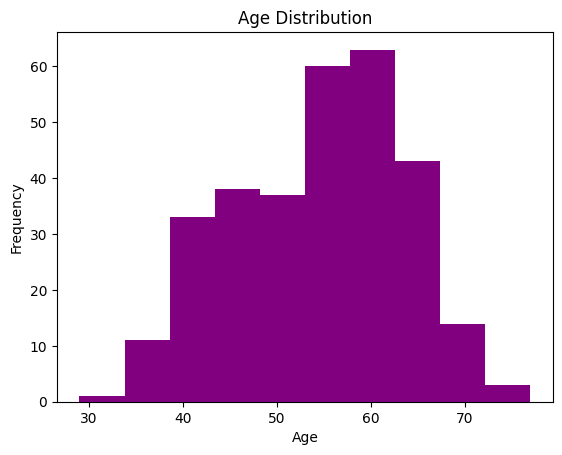

In [26]:
# understanding the distribution of age
plt.hist(data=data,x="age",color="purple")
plt.xlabel("Age")
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()

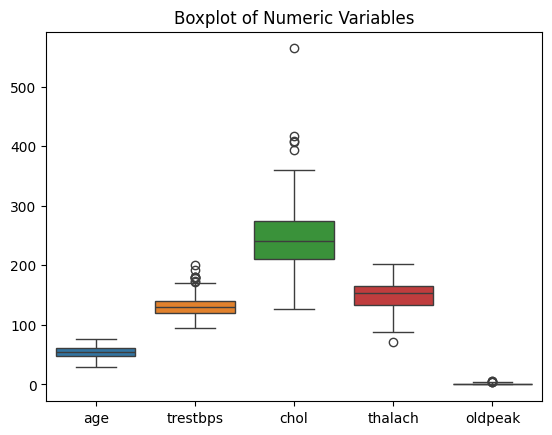

In [ ]:
# Visualizing outliers using boxplot
sns.boxplot(data=data[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']])
plt.title("Boxplot of Numeric Variables")
plt.show()

## Description 
From the boxplot,it can be seen there are outliers in some of the columns. We can also detect these outliers using statistical methods.

In [39]:
outliers=pd.DataFrame()
for col in data.select_dtypes(include=['float64', 'int64']):
        Q1=data[col].quantile(0.25)
        Q3=data[col].quantile(0.75)
        IQR=Q3-Q1
        lowerbound=Q1-1.5*IQR
        upperbound=Q3+1.5*IQR
        outliers_col=data[(data[col]<lowerbound)| (data[col]>upperbound)]
        
        outliers=pd.concat([outliers,outliers_col])
outliers  

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
101,59,1,3,178,270,0,0,145,0,4.2,0,0,3,1
110,64,0,0,180,325,0,1,154,1,0.0,2,0,2,1
203,68,1,2,180,274,1,0,150,1,1.6,1,0,3,0
223,56,0,0,200,288,1,0,133,1,4.0,0,2,3,0
241,59,0,0,174,249,0,1,143,1,0.0,1,0,2,0
248,54,1,1,192,283,0,0,195,0,0.0,2,1,3,0
260,66,0,0,178,228,1,1,165,1,1.0,1,2,3,0
266,55,0,0,180,327,0,2,117,1,3.4,1,0,2,0
28,65,0,2,140,417,1,0,157,0,0.8,2,1,2,1


# Handling Outliers

In [43]:
# Handling Outliers

for col in ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Cap values at the lower and upper bounds
    data[col] = np.where(data[col] < lower_bound, lower_bound,
                         np.where(data[col] > upper_bound, upper_bound, data[col]))

Values that are below the lower bound have been replaced by the lower bound and values that are above the upper bound have been replaced by the upper bound.

After handling the outliers a boxplot can be plotted to verify that every outlier has been handled.

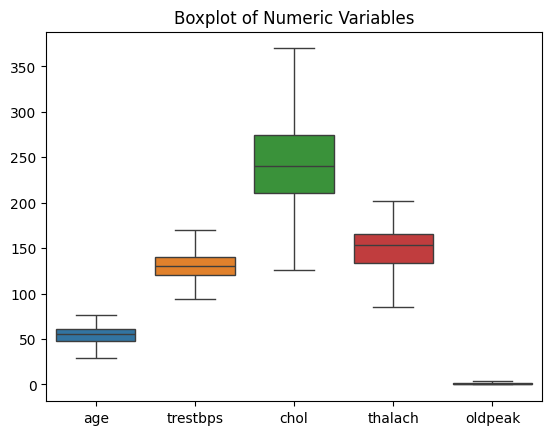

In [44]:
# Visualizing outliers using boxplot
sns.boxplot(data=data[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']])
plt.title("Boxplot of Numeric Variables")
plt.show()

## Visualizing the Relationship between Age and Cholestrol level

Text(0.5, 1.05, 'Cholesterol Levels by Age, Sex, and Target Variable')

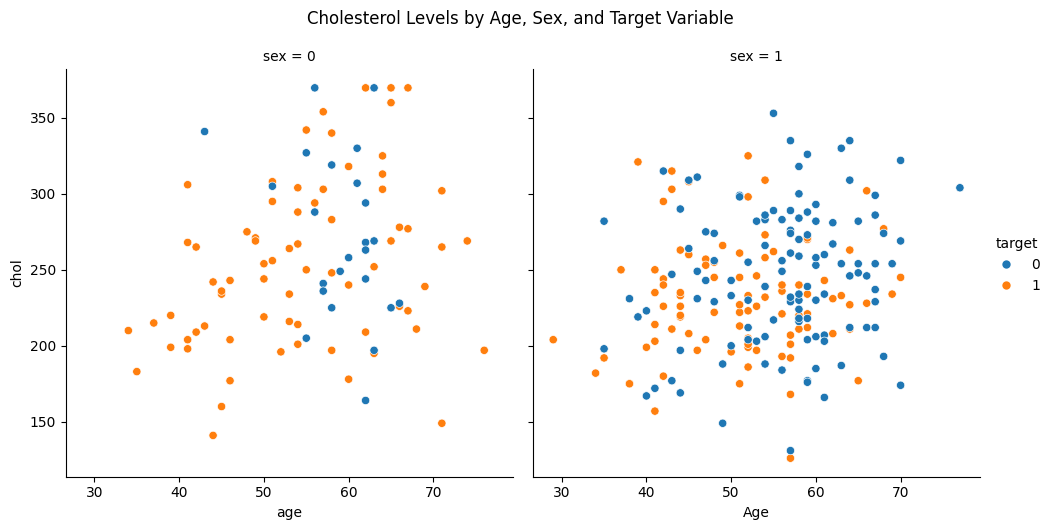

In [ ]:
# Scatter plot
sns.relplot(data,x="age",y="chol",hue="target",col="sex")
plt.xlabel("Age")
plt.ylabel("Cholesterol (mg/dl)")
plt.suptitle("Cholesterol Levels by Age, Sex, and Target Variable", y=1.05)

Text(0.5, 1.0, 'Distribution of Heart Disease by Gender')

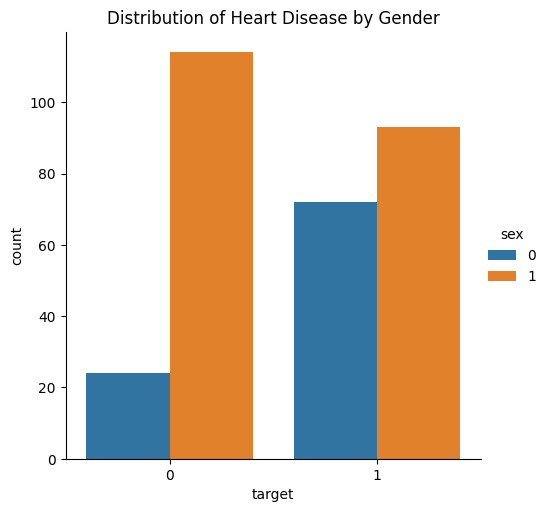

In [71]:
# Visualizing the Distribution of Heart Disease by Gender
sns.catplot(data,x="target",hue="sex",kind="count")
plt.title("Distribution of Heart Disease by Gender")

## Comparing the cholestrol level for those who have Heart disease and for those who do not

### Relationship between Heart rate and Heart Disease

In [68]:
data.groupby("target")["thalach",].mean()

C:\Users\Admin\AppData\Local\Temp\ipykernel_21712\2972167994.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby("target")["thalach",].mean()


,thalach
target,
0,139.201087
1,158.466667


The maximum heart rate achieved during a stress test is higher in the presence of Heart Disease.

In [69]:
# correlation
data.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.286134,0.205856,0.121308,-0.116211,-0.398246,0.096801,0.213242,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.047594,-0.180779,0.045032,-0.058196,-0.042937,0.141664,0.105256,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.056267,-0.094081,0.094444,0.044421,0.295748,-0.394280,-0.144957,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.286134,-0.047594,0.056267,1.000000,0.132934,0.168393,-0.116535,-0.053717,0.055354,0.180601,-0.113723,0.102909,0.050339,-0.138621
chol,0.205856,-0.180779,-0.094081,0.132934,1.000000,0.015189,-0.140696,-0.019543,0.083809,0.057323,0.005704,0.077680,0.089103,-0.103987
fbs,0.121308,0.045032,0.094444,0.168393,0.015189,1.000000,-0.084189,-0.009455,0.025665,0.011732,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.116535,-0.140696,-0.084189,1.000000,0.046196,-0.070733,-0.062437,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398246,-0.042937,0.295748,-0.053717,-0.019543,-0.009455,0.046196,1.000000,-0.382586,-0.351496,0.387921,-0.215944,-0.098070,0.422210
exang,0.096801,0.141664,-0.394280,0.055354,0.083809,0.025665,-0.070733,-0.382586,1.000000,0.299565,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.213242,0.105256,-0.144957,0.180601,0.057323,0.011732,-0.062437,-0.351496,0.299565,1.000000,-0.573853,0.218187,0.208407,-0.436680


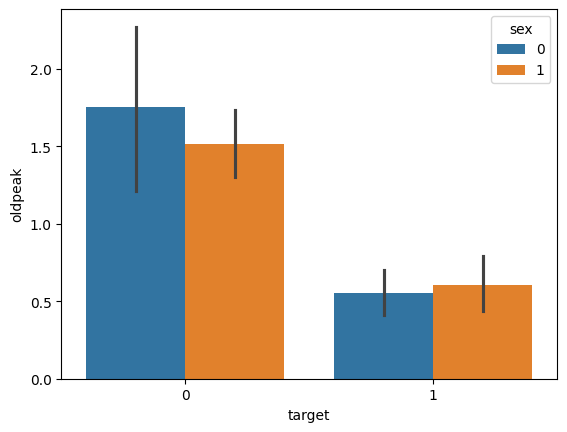

In [77]:
sns.barplot(data=data,x="target",y="oldpeak",hue="sex")
plt.show()